In [2]:
#Importing the neccessary libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [3]:
data = pandas.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting the Distribution of scores

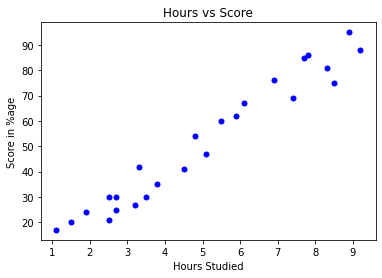

In [4]:
plt.plot(data['Hours'], data['Scores'], '.', ms ='10', mec = 'b', mfc = 'b')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in %age')  
plt.show()

#### From the graph, it is clear that there is a positive linear relation between the number of hours studied and the score

### Preparing the Data

In [5]:
X = data.iloc[:, :-1].values #Array of Hours studied
y = data.iloc[:, 1].values #Array of percentage score

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state = 0) #80% for training and 20% for testing

### Training the Algorithm

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.score(X_test,y_test))
print('Training completed successfully.')

0.9454906892105355
Training completed successfully.


### Plotting the Regression line

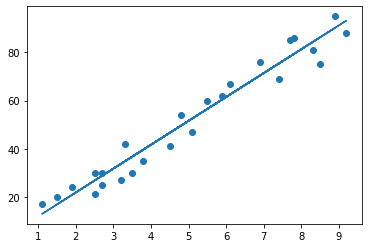

In [9]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

### Making Predictions

In [10]:
print(X_test) #Testing data - Number of Hours
y_predict = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
comparison = {'Actual': y_test, 'Predicted': y_predict}
df = pandas.DataFrame(comparison)

In [12]:
df #Comparison between Actual values and the Predicted Values

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
hours = [[9.25]] #Making my own Predictions
my_predict = regressor.predict(hours)
print(f'Number of Hours = {hours}')
print(f'Predicted Percentage score = {my_predict[0]}')

Number of Hours = [[9.25]]
Predicted Percentage score = 93.69173248737535


### Evaluation of the Model

In [14]:
#Evaluating the model with Mean Absolute Error method
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 4.183859899002975
